In [1]:
import pandas as pd #Using pandas to read csv data

from matplotlib import pyplot as plt #for ploting

import numpy as np

from scipy.fft import fft, ifft

In [2]:
dataframe = pd.read_csv('./2019_fixed/H1.csv', delimiter=',', low_memory=False) #dataframe has type pandas.core.frame.dataframeFrame

In [3]:
offsetRow = 5
timestampPerDay = 96
numberOfDays=int((dataframe.shape[0]-offsetRow)/timestampPerDay)
t = range(0,96) #for time axes 


def convertCommaDot(s):
    return float(s.replace(',','.'))

def get_data_from_table(day,offset,timestampPerDay,columnNr,dataframe):
    data = dataframe.iloc[offsetRow+day*timestampPerDay:(timestampPerDay+offsetRow)+day*timestampPerDay,columnNr] #Data type = pandas.Series of string
    data = list(map(convertCommaDot, data))
    return data

def get_list_for_max_value(columnNr):
    data = dataframe.iloc[5:,columnNr]
    data = list(map(convertCommaDot, data))
    data = [float(i) for i in data]
    return data

def plot_fft(dataList):
    dataNP = np.asarray(dataList)
    dataFT = fft(dataNP)
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
    ax.plot(t, dataFT)
    #ax.set_xticks([0,11,23,35,47,59,71,83,95])
    plt.show()
    
def plot_figure(dataList, columnNumber,maxValue):
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
    ax.plot(t, dataList)
    ax.set_xlabel('Time')
    ax.set_title(columnDict[columnNumber])
    yAx=list(range(0,11))
    ax.set_yticks([maxValue/10*x for x in yAx])
    #ax.set_xticks([0,11,23,35,47,59,71,83,95])
    #ax.set_xticklabels(['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','23:45'])
    plt.show()

columnDict = {
    13: "Relais für die Erfassung der Betriebsstunden für Pumpe 1",
    14: "Relais für die Erfassung der Betriebsstunden für Pumpe 4",
    15: "Zähler für el. Heizstrom im Haushalt",
    16: "Zähler für Ventilator im Haushalt",
    17: "Zähler für Trinkwarmwasser im Haushalt",
    18: "Zähler für elektrischen Verbraucher",
    19: "Hauptzähler",
}

maxDict = {
    13: max(get_list_for_max_value(13)),
    14: max(get_list_for_max_value(14)),
    15: max(get_list_for_max_value(15)),
    16: max(get_list_for_max_value(16)),
    17: max(get_list_for_max_value(17)),
    18: max(get_list_for_max_value(18)),
    19: max(get_list_for_max_value(19)),
}
        

Data of P1_H*_EDA, P4_H*_EDA, Z1_Bad_H*_EDA, Z1_RLT_H*_EDA not relevant?

When the warm water is turned on?

warm water not relevant with the schedule of user?

-> tracking only Elektric Verbrauch

Definition of saving electric? how to see that

0 Di 01.01.19


<Figure size 432x288 with 0 Axes>

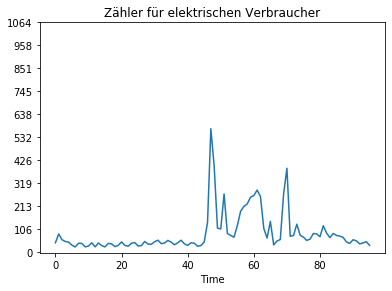

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


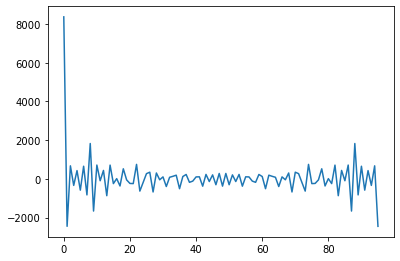

KeyboardInterrupt: Interrupted by user

In [4]:
for day in range(0,numberOfDays):
    plt.clf()
    date = dataframe.iloc[offsetRow+day*timestampPerDay,6]
    print(day, date)
    #for columnNumber in range(17,19):  
    columnNumber = 18
    data = get_data_from_table(day,offsetRow,timestampPerDay,columnNumber,dataframe)

    plot_figure(data,columnNumber,maxDict[columnNumber])
    plot_fft(data)
    
    x = input() #wait for checking table